In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

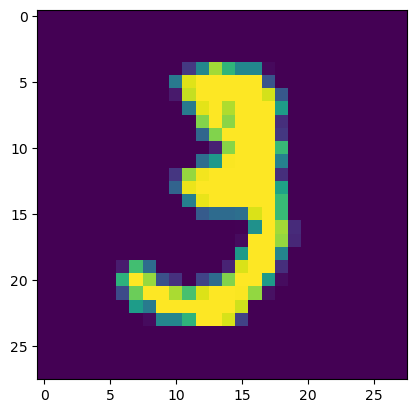

In [6]:
plt.imshow(x_train[10])

In [7]:
y_train[10]

3

In [8]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [10]:
x_train = x_train/255.0

In [11]:
x_test = x_test/255.0

In [12]:
x_train = x_train.reshape((60000, 28, 28,1))
x_test = x_test.reshape((10000, 28, 28,1))

In [13]:
input_shape = x_train[0].shape

In [14]:
input_shape

(28, 28, 1)

In [15]:
model = tf.keras.models.Sequential()

In [16]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128,activation='relu'))

model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                        

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'], run_eagerly=True)

In [19]:
import keras

callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [20]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/10
469/469 [==============================] - 314s 669ms/step - loss: 0.1448 - sparse_categorical_accuracy: 0.9566 - val_loss: 0.0392 - val_sparse_categorical_accuracy: 0.9874
Epoch 2/10
469/469 [==============================] - 312s 666ms/step - loss: 0.0417 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.0318 - val_sparse_categorical_accuracy: 0.9892


In [21]:
y_pred_probabilities = model.predict(x_test)
y_pred_classes = y_pred_probabilities.argmax(axis=-1)

313/313 [==============================] - 17s 55ms/step


In [22]:
y_pred_classes[12]

9

In [23]:
y_test[12]

9

In [24]:
y_test[0]

7

In [25]:
y_pred_classes[0]

7

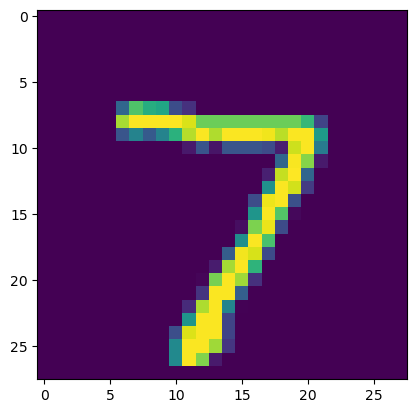

In [26]:
plt.imshow(x_test[0])

In [27]:
# Save the model
model.save('DigitRecognitionwithCNN.h5')



In [28]:
from keras.models import load_model

loaded_model = load_model('DigitRecognitionwithCNN.h5')

In [29]:
y_pred_probabilities = loaded_model.predict(x_test)
y_pred_classes = y_pred_probabilities.argmax(axis=-1)

313/313 [==============================] - 11s 33ms/step


In [30]:
y_pred_classes[123]

6

In [31]:
y_test[123]

6

1/1 [==============================] - 0s 47ms/step


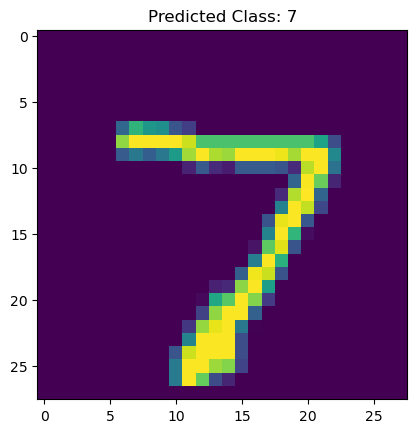

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image from your system
img_path = r"C:\Users\Gyanender\Desktop\test.png"  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the model input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalize the pixel values
img_array = img_array / 255.0

predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)

# Display the result
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

In [33]:
def predict_class(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = img_array / 255.0

    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)

    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()
    
    return predicted_class

In [34]:
img_path = r"C:\Users\Gyanender\Desktop\test.png"

1/1 [==============================] - 0s 40ms/step


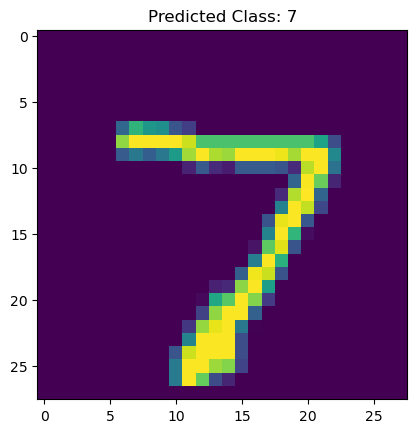

7

In [35]:
predict_class(img_path)